In [ ]:
!git clone https://github.com/hai-pham-the/QSAR-Class-HUP-.git

Cloning into 'QSAR-Class-HUP-'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 4.94 KiB | 4.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls QSAR-Class-HUP-/data

git  PbL_Sensitivity_mlr.csv


In [ ]:
cd QSAR-Class-HUP-/data

/content/QSAR-Class-HUP-/data/QSAR-Class-HUP-/data


In [ ]:
#Library to performe the sequential feature selection (step forward selection)
!pip install mlxtend

,ID,Name,Series,PS,MATS6v,MATS2i,GATS4i,GGI8,JGI8,SpMin5_Bh(s),Eta_F_A
0,1,SEN-01,Training,30.0,0.001,-0.167,1.087,0.346,0.006,1.353,0.365
1,2,SEN-02,Test,24.0,0.011,-0.169,1.074,0.444,0.008,1.356,0.367
2,3,SEN-03,Training,18.0,0.032,-0.171,1.048,0.543,0.009,1.358,0.370
3,4,SEN-04,Training,27.0,-0.012,-0.077,1.365,0.099,0.008,0.923,0.802
4,5,SEN-05,Training,26.0,-0.155,-0.108,0.976,0.107,0.007,0.853,0.728


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
#from genetic_selection import GeneticSelectionCV
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

In [ ]:
#Read the data from the github
import pandas as pd
data_s=pd.read_csv('PbL_Sensitivity_mlr.csv',low_memory=False)

In [ ]:
data_s.head()

,ID,Name,Series,PS,MATS6v,MATS2i,GATS4i,GGI8,JGI8,SpMin5_Bh(s),Eta_F_A
0,1,SEN-01,Training,30.0,0.001,-0.167,1.087,0.346,0.006,1.353,0.365
1,2,SEN-02,Test,24.0,0.011,-0.169,1.074,0.444,0.008,1.356,0.367
2,3,SEN-03,Training,18.0,0.032,-0.171,1.048,0.543,0.009,1.358,0.370
3,4,SEN-04,Training,27.0,-0.012,-0.077,1.365,0.099,0.008,0.923,0.802
4,5,SEN-05,Training,26.0,-0.155,-0.108,0.976,0.107,0.007,0.853,0.728


In [ ]:
#Separate data in training and test set
data_t = data_s[data_s['Series'] == 'Training']
data_v = data_s[data_s['Series'] == 'Test']
print('Training set size:',data_t.shape)
print('Prediction set size:',data_v.shape)

Training set size: (36, 11)
Prediction set size: (9, 11)


In [ ]:
# split to x (descriptors) and y (response variable)
df_X = data_t.iloc[:,4:]
df_Y = data_t[['PS']]


#split to x and y test
df_X_test = data_v.iloc[:,4:]
df_y_test = data_v[['PS']]

y_test=df_y_test.to_numpy().ravel()
y_train=df_Y.to_numpy().ravel()

#Visualize the shape of your data
print('Ytrain:',df_Y.head(3))
print('Ytrain_array:',y_train[0:8])
print('\nXtrain shape:',df_X.shape)
print('Xtrain:\n',df_X.iloc[:,0:7].head(3))

print('\nYtest:',df_y_test.head(3))
print('Ytest_array:',y_test[0:6])
print('\nXtest shape:',df_X_test.shape)
print('Xtest:\n',df_X_test.iloc[:,0:7].head(3))

Ytrain:      PS
0  30.0
2  18.0
3  27.0
Ytrain_array: [30. 18. 27. 26. 51. 37. 34. 44.]

Xtrain shape: (36, 7)
Xtrain:
    MATS6v  MATS2i  GATS4i   GGI8   JGI8  SpMin5_Bh(s)  Eta_F_A
0   0.001  -0.167   1.087  0.346  0.006         1.353    0.365
2   0.032  -0.171   1.048  0.543  0.009         1.358    0.370
3  -0.012  -0.077   1.365  0.099  0.008         0.923    0.802

Ytest:       PS
1   24.0
15  42.0
21  27.0
Ytest_array: [24. 42. 27.  0. 25. 28.]

Xtest shape: (9, 7)
Xtest:
     MATS6v  MATS2i  GATS4i   GGI8   JGI8  SpMin5_Bh(s)  Eta_F_A
1    0.011  -0.169   1.074  0.444  0.008         1.356    0.367
15  -0.017   0.141   1.057  0.427  0.008         1.059    1.128
21   0.093  -0.120   1.104  0.624  0.009         1.221    0.958


In [ ]:
x_train = df_X
x_test = df_X_test

In [ ]:
#Ignore if data loaded already normalized

#Normalize the data
from sklearn import preprocessing
df=pd.DataFrame(x_train)
saved_cols = df.columns
min_max_scaler = preprocessing.MinMaxScaler().fit(df)
np_scaled = min_max_scaler.transform(df)
df_normalized = pd.DataFrame(np_scaled,columns=saved_cols)

#Normalization of prediction using the trainig
pred_scaled = min_max_scaler.transform(x_test)
pred_normalized = pd.DataFrame(pred_scaled,columns=saved_cols)
#return  df_normalized

print('***** Ouput normalized data ******\n')
print('x_train shape:',df_normalized.shape)
print('x_train normalized:\n',df_normalized.iloc[:,0:7].head(3))

print('x_test shape:',pred_normalized.shape)
print('x_test normalized:\n',pred_normalized.iloc[:,0:7].head(3))

***** Ouput normalized data ******

x_train shape: (36, 7)
x_train normalized:
      MATS6v    MATS2i    GATS4i      GGI8  JGI8  SpMin5_Bh(s)   Eta_F_A
0  0.678125  0.347619  0.655941  0.386592  0.30      0.903204  0.000000
1  0.775000  0.338095  0.607673  0.606704  0.45      0.906542  0.004798
2  0.637500  0.561905  1.000000  0.110615  0.40      0.616155  0.419386
x_test shape: (9, 7)
x_test normalized:
      MATS6v    MATS2i    GATS4i      GGI8  JGI8  SpMin5_Bh(s)   Eta_F_A
0  0.709375  0.342857  0.639851  0.496089  0.40      0.905207  0.001919
1  0.621875  1.080952  0.618812  0.477095  0.40      0.706943  0.732246
2  0.965625  0.459524  0.676980  0.697207  0.45      0.815087  0.569098


In [ ]:
#Ignore if data loaded already normalized

#Joint and Save normalized data
y_train_n = data_t.iloc[:,0:4].reset_index(drop=True)
data_train_norm = pd.concat([y_train_n, df_normalized],axis=1)
print('**** Normalized training and set set *****\n')
print(data_train_norm.iloc[:,0:6].head(3))
print(data_train_norm.shape)

y_test_n = data_v.iloc[:,0:4].reset_index(drop=True)
data_test_norm = pd.concat([y_test_n, pred_normalized],axis=1)
print('')
print(data_test_norm.iloc[:,0:6].head(3))
print(data_test_norm.shape)

data_norm = pd.concat([data_train_norm, data_test_norm],axis=0)
print('\nData Concatenated Shape:', data_norm.shape)
#data_norm.to_csv('data_norm.csv',index=False)

**** Normalized training and set set *****

   ID    Name    Series    PS    MATS6v    MATS2i
0   1  SEN-01  Training  30.0  0.678125  0.347619
1   3  SEN-03  Training  18.0  0.775000  0.338095
2   4  SEN-04  Training  27.0  0.637500  0.561905
(36, 11)

   ID    Name Series    PS    MATS6v    MATS2i
0   2  SEN-02   Test  24.0  0.709375  0.342857
1  16  SEN-16   Test  42.0  0.621875  1.080952
2  22  SEN-22   Test  27.0  0.965625  0.459524
(9, 11)

Data Concatenated Shape: (45, 11)


In [ ]:
#Download the normalize data to your computer
data_norm.to_csv('data_norm.csv',index=False)
from google.colab import files
files.download("data_norm.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Importing libraries for model selection
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
#Recursive Feature Elimination
rfe=RFE(estimator=LinearRegression(),n_features_to_select=7,verbose=0)
rfe.fit(df_X,y_train)
rf_mask=rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = df_X.loc[:, rf_mask]
#reduced_X.to_csv('reduced_RFE_5var_lr_ascending3v2.csv',index=False)
X_train=reduced_X

# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

#fitting model for train and test set
X_test=df_X_test.loc[:, rf_mask]
y_test_p = model.predict(X_test)
y_train_p = model.predict(X_train)
R2_test = r2_score(y_test,y_test_p)
R2 = r2_score(y_train,y_train_p)

#append the results to the dataframe and saving
d = {"R2":[],"R2_test":[],"features":[]}
d["R2"].append(R2)
d["R2_test"].append(R2_test)
d['features'].append(X_train.columns.values.tolist())
df_report = pd.DataFrame(d)
#df_report.to_csv('RFE_Report_32wper_5var_lr_ascending3v2.csv', index=False)
print(df_report)

         R2   R2_test                                           features
0  0.926379  0.705426  [MATS6v, MATS2i, GATS4i, GGI8, JGI8, SpMin5_Bh...


In [ ]:
### Running Feature Selection based on Step Foward Selection

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# To store results from multiple SFS
features_select_report_lr = pd.DataFrame()

#adr = AdaBoostRegressor(base_estimator= LinearRegression(),random_state=42)
#dtr = DecisionTreeRegressor(random_state=42)
#gbr = GradientBoostingRegressor(random_state=42)
#knn = KNeighborsRegressor(random_state=42)
#mlp = MLPRegressor(max_iter=100,random_state=42)
#rf = RandomForestRegressor(random_state=42)
#svr = SVR(random_state=42)
lr = LinearRegression()

sfs_lr = SFS(lr,
          k_features=7,
          forward=True,
          floating=False,
          verbose=2,
          scoring='neg_mean_squared_error',
          n_jobs=-1,
          cv=10)

sfs_lr = sfs_lr.fit(df_normalized, y_train)

#Store result
features_select_report_temp_lr = pd.DataFrame.from_dict(sfs_lr.get_metric_dict()).T
#features_select_report_temp['i_max_depth'] = i_max_depth
features_select_report_lr = pd.concat([features_select_report_lr,
                                       features_select_report_temp_lr])

sfs_report =features_select_report_lr.sort_values('avg_score',
                                      ascending=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    1.4s finished

[2024-01-10 20:04:03] Features: 1/7 -- score: -147.80429518351121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2024-01-10 20:04:03] Features: 2/7 -- score: -114.47597323141152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2024-01-10 20:04:03] Features: 3/7 -- score: -87.73497945580492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2024-01-10 20:04:03] Features: 4/7 -- score: -50.038230723441266[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[

In [ ]:
sfs_report.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 3, 4, 5, 6)","[-46.81936616200886, -34.11608447356967, -23.4...",-23.380933,"(MATS6v, MATS2i, GGI8, JGI8, SpMin5_Bh(s), Eta...",11.136446,14.99428,4.998093
7,"(0, 1, 2, 3, 4, 5, 6)","[-38.33018185920575, -24.29163576598093, -22.7...",-25.2745,"(MATS6v, MATS2i, GATS4i, GGI8, JGI8, SpMin5_Bh...",12.129654,16.331551,5.44385
5,"(1, 3, 4, 5, 6)","[-22.68124478116844, -34.80940821440251, -34.8...",-40.744218,"(MATS2i, GGI8, JGI8, SpMin5_Bh(s), Eta_F_A)",18.743325,25.236298,8.412099
4,"(1, 3, 4, 5)","[-70.03119044141883, -25.98442172767457, -54.8...",-50.038231,"(MATS2i, GGI8, JGI8, SpMin5_Bh(s))",30.188365,40.646073,13.548691
3,"(1, 4, 5)","[-89.89348996087786, -56.90579282759164, -78.3...",-87.734979,"(MATS2i, JGI8, SpMin5_Bh(s))",56.262416,75.752571,25.250857


In [ ]:
fs_array

array([(0, 1, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5, 6), (1, 3, 4, 5, 6),
       (1, 3, 4, 5), (1, 4, 5), (1, 5), (5,)], dtype=object)

In [ ]:
#Selection of the features from the output of the feature selection
#To use as input for the model building

#features_selection=pd.read_csv('sfs_report_32wper_5var_lr__log_ascending4v2_norm_insideT.csv')
features_selection = sfs_report

idx=(features_selection['feature_idx'])

# Example 1: Convert specific column use to_numpy()
import numpy as np
fs_array = features_selection['feature_idx'].to_numpy()

#fs_array[-1]
#string = '(1661,)'
fse=[]
for item in reversed(fs_array):
    #fs_array[0] = fs_array[0].strip("()").rstrip(",")
    # Assuming 'item' is a tuple
    item = str(item)  # Convert the tuple to a string
    item = item.strip("()").rstrip(",")
    fse.append(item)
    print(item)

print('List of each subset selected')
for item in fse:
    fse_list = [int(x) for x in item.split(',')]
    print(fse_list)

print('fse:',fse)
#for i in fse_list:
 #   print(i)
    #col1=eval(i)
  #  x_train_fs=df_X.iloc[:,i]
#  x_test_fs=df_X_test.iloc[:,i]
 #   print('Xtrain size:',len(x_train_fs))
  #  print('Xtest size:',len(x_test_fs))




5
1, 5
1, 4, 5
1, 3, 4, 5
1, 3, 4, 5, 6
0, 1, 2, 3, 4, 5, 6
0, 1, 3, 4, 5, 6
List of each subset selected
[5]
[1, 5]
[1, 4, 5]
[1, 3, 4, 5]
[1, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 3, 4, 5, 6]
fse: ['5', '1, 5', '1, 4, 5', '1, 3, 4, 5', '1, 3, 4, 5, 6', '0, 1, 2, 3, 4, 5, 6', '0, 1, 3, 4, 5, 6']


In [ ]:
seen_values = set()
unique_values = []

for indices in fse:
    indices_list = indices.split(', ')
    for index in indices_list:
        if index not in seen_values:
            seen_values.add(index)
            unique_values.append(index)

# Create a DataFrame with the unique values
df_stepforward = pd.DataFrame({'step_forward': unique_values})
df_stepforward['step_forward'] = df_stepforward['step_forward'].astype(int)

# Get the variable name corresponding to columns
df_stepforward['variable_name'] = df_normalized.columns[df_stepforward['step_forward']]

# Print the resulting DataFrame
print(df_stepforward.dtypes)
print(df_stepforward)

step_forward      int64
variable_name    object
dtype: object
   step_forward variable_name
0             5  SpMin5_Bh(s)
1             1        MATS2i
2             4          JGI8
3             3          GGI8
4             6       Eta_F_A
5             0        MATS6v
6             2        GATS4i


In [ ]:
results = []

for item in fse:
    # split the string into a list of integers
    cols = [int(x) for x in item.split(',')]
    # select columns in the current iteration
    x_train = df_normalized.iloc[:, cols]
    x_test = pred_normalized.iloc[:, cols]
    # fit and evaluate the model
    #estimator = DecisionTreeRegressor()
    #estimator = RandomForestRegressor()
    estimator = LinearRegression()
    rg_Lr = estimator
    rg_Lr.fit(x_train, y_train)
    y_train_pred = rg_Lr.predict(x_train)
    y_test_pred = rg_Lr.predict(x_test)
    train_score = r2_score(df_Y, y_train_pred)
    test_score = r2_score(df_y_test, y_test_pred)

    # Evaluate the R2 score with cross-validation
    #scores = cross_val_score(rg_Lr, x_train, y_train,
             #            cv=KFold(n_splits=1, shuffle=True), scoring='r2')
    #loo_scores= np.mean(scores)
    #print("R2 score:", np.mean(scores), "±", np.std(scores))
    # append the results to the list
    results.append([len(cols), train_score, test_score,train_score-test_score])

# convert the results list to a dataframe
df_results = pd.DataFrame(results, columns=['Variables', 'R2_train', 'R2_test',
                                            'Dif_score'])
df_results2=df_results.sort_values('Variables', ascending=1)
df_nodescriptors=df_results2.reset_index()
df_nodescriptors=df_nodescriptors.drop(['index'],axis=1)
# concatenate the dataframes horizontally
df_concat = pd.concat([df_nodescriptors, df_stepforward], axis=1)

#save the dataframe
#df_concat.to_csv('df_2Var_32wper_ascending_d4_lr_log_SFSv2_insideT.csv')
print(df_concat)

   Variables  R2_train   R2_test  Dif_score  step_forward variable_name
0          1  0.477565 -0.088823   0.566388             5  SpMin5_Bh(s)
1          2  0.608842  0.457579   0.151262             1        MATS2i
2          3  0.733269  0.566499   0.166770             4          JGI8
3          4  0.822550  0.456064   0.366486             3          GGI8
4          5  0.859201  0.670121   0.189080             6       Eta_F_A
5          6  0.914835  0.699258   0.215578             0        MATS6v
6          7  0.926379  0.705426   0.220953             2        GATS4i


In [ ]:
#Save the obtained feature selection data
#Download the data to your computer
df_concat.to_csv('df_concat.csv')
from google.colab import files
files.download("df_concat.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

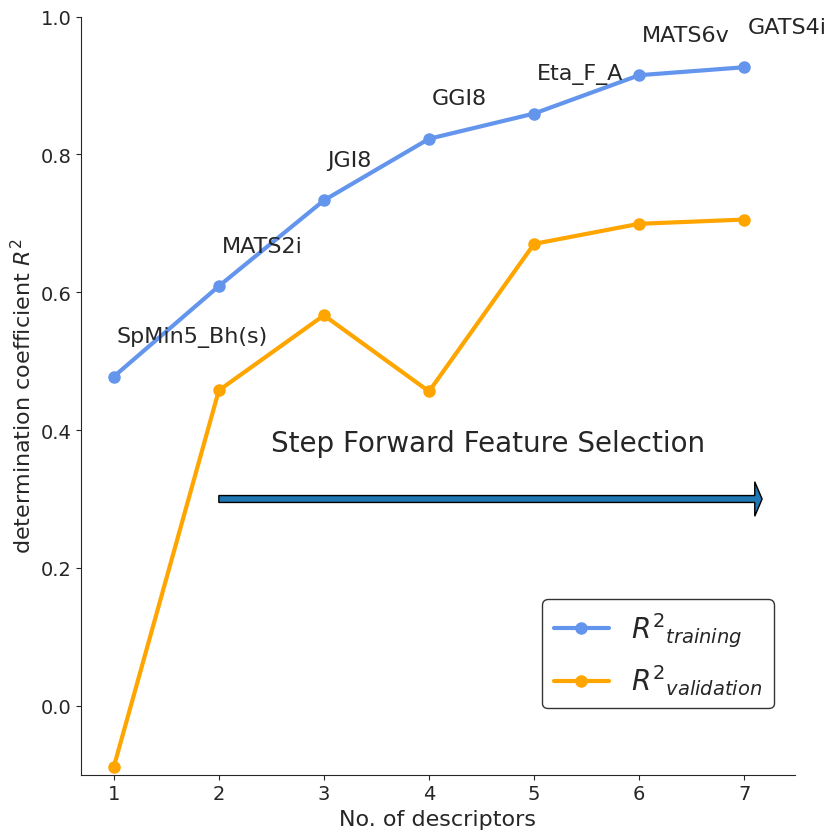

In [ ]:
#Plot number of descriptors vs determination coefficient (R^2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

fig, ax = plt.subplots()
fig.set_size_inches(8.5,8.5)



# multiple line plots
plt.plot( 'Variables', 'R2_train', data=df_concat, marker='o',
         markerfacecolor='cornflowerblue',
         markersize=8, color='cornflowerblue', linewidth=3, alpha=1,)

#plt.plot( 'Variables', 'Q2_loo', data=df_nodescriptors, marker='o', markerfacecolor='olivedrab',
 #        markersize=8, color='olivedrab',linewidth=3,)

plt.plot( 'Variables', 'R2_test', data=df_concat, marker='o', markerfacecolor='orange',
         markersize=8, color='orange'
         , linewidth=3,)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.plot([2,2],[0,1],lw=1,ls='dashed',color='black',alpha=0.6)
#plt.plot([5,5],[0,1],lw=1,ls='dashed',color='black',alpha=0.6)
plt.yticks(fontsize=14)
plt.ylabel('determination coefficient $R^{2}$',fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel('No. of descriptors',fontsize=16)
plt.ylim(-0.1,1)
#plt.xlim(-0.00001,5.5)
plt.legend(['$R^{2}$$_{training}$','$R^{2}$$_{validation}$'],
           bbox_to_anchor=(0.99, 0.25),loc='upper right',
           fontsize=20,edgecolor='black')

#add arrow to plot
plt.arrow(2, 0.30, 5.1, 0.00, width=.01,head_width=0.05, head_length=0.07, fc='tab:blue', ec='k')
#plt.arrow(1.25, 0.94, 0.61, -0.16, head_width=0.01, head_length=0.05, fc='k', ec='k')
#plt.arrow(3.35, 0.94, 1.55, -0.03, head_width=0.01, head_length=0.05, fc='k', ec='k')
#add annotation

# Set the x-tick interval to 1
plt.xticks(range(min(df_concat['Variables']), max(df_concat['Variables'])+1, 1))
#plt.annotate('Best Model', xy = (0.9,0.95),size=20)
plt.annotate('Step Forward Feature Selection', xy = (2.5,0.37),size=20)

#y = (df_concat['R2_test']+df_concat['R2_train'])/2
y = df_concat['R2_train']
labels = df_concat['variable_name']
positions = df_concat['Variables']
# Annotate the plot with labels
for label, pos, value in zip(labels, positions, y):
    plt.text(pos+0.03, value+0.05, label, ha='left',fontsize=16)

# show legend
#plt.legend()
plt.tight_layout()

#plt.savefig("Fig_NDesc_32Cu_wl_mol2.png",dpi=600)

#plt.savefig("Fig_NDesc_32wper_norm4_asc_lr_log_transparent_insideT.png",dpi=600,transparent=True) #
#plt.close()
# show graph
plt.show()

In [ ]:
#Select x_train based on the descriptors selected

# select the first six rows in 'step_forward' and convert them to a list
cols = df_concat.loc[:6, 'variable_name'].tolist()
#Load already selected columns
#cols = ['HATS3u','P_VSA_charge_10']
print(cols)

x_train = df_normalized.loc[:, cols]
x_test = pred_normalized.loc[:, cols]

print('x_train shape:',x_train.shape)
print('x_train:\n',x_train.head(3))

print('x_test shape:',x_test.shape)
print('x_test:\n',x_test.head(3))

['SpMin5_Bh(s)', 'MATS2i', 'JGI8', 'GGI8', 'Eta_F_A', 'MATS6v', 'GATS4i']
x_train shape: (36, 7)
x_train:
    SpMin5_Bh(s)    MATS2i  JGI8      GGI8   Eta_F_A    MATS6v    GATS4i
0      0.903204  0.347619  0.30  0.386592  0.000000  0.678125  0.655941
1      0.906542  0.338095  0.45  0.606704  0.004798  0.775000  0.607673
2      0.616155  0.561905  0.40  0.110615  0.419386  0.637500  1.000000
x_test shape: (9, 7)
x_test:
    SpMin5_Bh(s)    MATS2i  JGI8      GGI8   Eta_F_A    MATS6v    GATS4i
0      0.905207  0.342857  0.40  0.496089  0.001919  0.709375  0.639851
1      0.706943  1.080952  0.40  0.477095  0.732246  0.621875  0.618812
2      0.815087  0.459524  0.45  0.697207  0.569098  0.965625  0.676980


In [ ]:
estimator = LinearRegression()
rg_Lr_norm = estimator
rg_Lr_norm.fit(x_train, y_train)
yhat_test_norm = rg_Lr_norm.predict(x_test)
yhat_train_norm = rg_Lr_norm.predict(x_train)
R2_test_norm = r2_score(y_test,yhat_test_norm)
R2_train_norm = r2_score(y_train,yhat_train_norm)

print('variables:',len(cols))
print('R2_train',round(R2_train_norm,4))
print('R2_test',round(R2_test_norm,3))
#print('R2_cv', R2_cv)
#print('intercept',rg_Lr.intercept_)
df_train_preds = pd.DataFrame()
df_val_preds = pd.DataFrame()

df_train_preds['y_t_obs']= y_train
df_train_preds['y_t_predMLR']=yhat_train_norm

df_val_preds['y_v_obs']= y_test
df_val_preds['y_v_predMLR']=yhat_test_norm

#df_train_preds.to_csv('df_train_preds.csv')
#df_val_preds.to_csv('df_val_preds.csv')
print(df_train_preds.head(3))
print(df_train_preds.shape)
print(df_val_preds.head(3))

variables: 7
R2_train 0.9264
R2_test 0.705
   y_t_obs  y_t_predMLR
0     30.0    24.143929
1     18.0    21.979895
2     27.0    31.747434
(36, 2)
   y_v_obs  y_v_predMLR
0     24.0    23.863854
1     42.0    44.433959
2     27.0    27.605480


In [ ]:
import matplotlib.pyplot as plt
# get importance
importance = rg_Lr_norm.coef_
importance= np.reshape(importance,len(cols))
intercept = rg_Lr_norm.intercept_
print('Intercept:',intercept)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

Intercept: -48.86487464206233
Feature: 0, Score: 71.9903563349
Feature: 1, Score: 28.3449561573
Feature: 2, Score: 45.0039239936
Feature: 3, Score: -50.3016012451
Feature: 4, Score: 19.4019422842
Feature: 5, Score: 16.3109560887
Feature: 6, Score: -10.6446818100


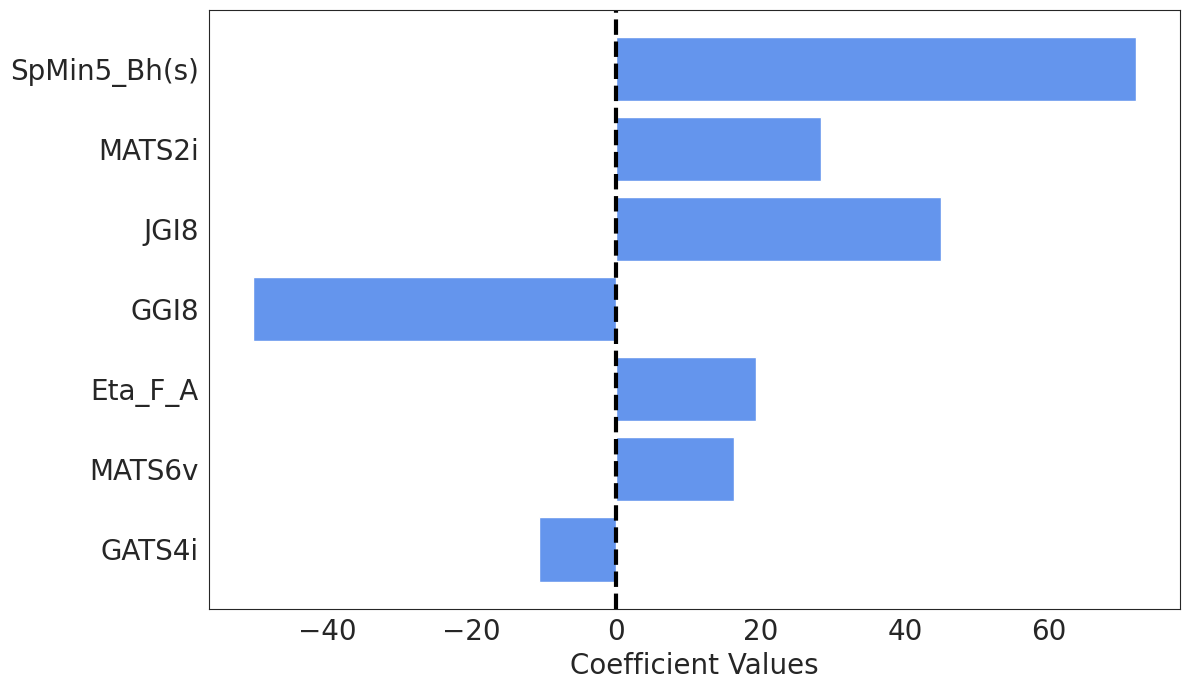

In [ ]:
#Plotting feature importance in MLR

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(12,7)

y_pos=np.arange(len(importance))

ax.barh(y_pos,importance,align='center',alpha=1,color='cornflowerblue')
ax.set_yticks(y_pos, labels=x_train.columns)
#ax.set_yticks(y_pos, labels=cols)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficient Values',fontsize=20)

#plt.title('Feature Importance',fontsize=30)


plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.axvline(x=0,lw=3,ls='dashed',color='black')
#plt.axhline(y=0, color='r', linestyle='-')
#plt.plot([0,0],[0,2],lw=2,ls='dashed',color='black',alpha=0.6)
#plt.text(-3.5,-1,'B',horizontalalignment='left',fontsize=30)


plt.tight_layout()
#plt.savefig("Fig2_DescContrib_2var_32wper_ascending_lr_log_norm4_insideT.png",dpi=600,transparent=True)
#plt.close()

plt.show()

In [ ]:
#Maximum and minimu values for the plot
#Getting the minimum x value

y_train = df_train_preds['y_t_obs']
yhat_train_norm= df_train_preds['y_t_predMLR']
y_test = df_val_preds['y_v_obs']
yhat_test_norm= df_val_preds['y_v_predMLR']

y_train_min=y_train.to_numpy().min()
y_test_min=y_test.to_numpy().min()
if y_train_min < y_test_min:
    x_lim_min = y_train_min
elif y_train_min > y_test_min:
    x_lim_min = y_test_min

if x_lim_min > 0:
    x_lim_minc=x_lim_min-x_lim_min*0.15
elif x_lim_min < 0:
    x_lim_minc=x_lim_min-abs(x_lim_min*0.15)
print('x_lim_minc:',x_lim_minc)

#Getting the maximum y value
y_train_max=y_train.to_numpy().max()
y_test_max=y_test.to_numpy().max()
if y_train_max > y_test_max:
    x_lim_max = y_train_max
elif y_train_max < y_test_max:
    x_lim_max = y_test_max
x_lim_maxc=x_lim_max+x_lim_max*0.1
print('x_lim_maxc:',x_lim_maxc)

x_lim_minc: -23.0
x_lim_maxc: 56.1


<Figure size 640x480 with 0 Axes>

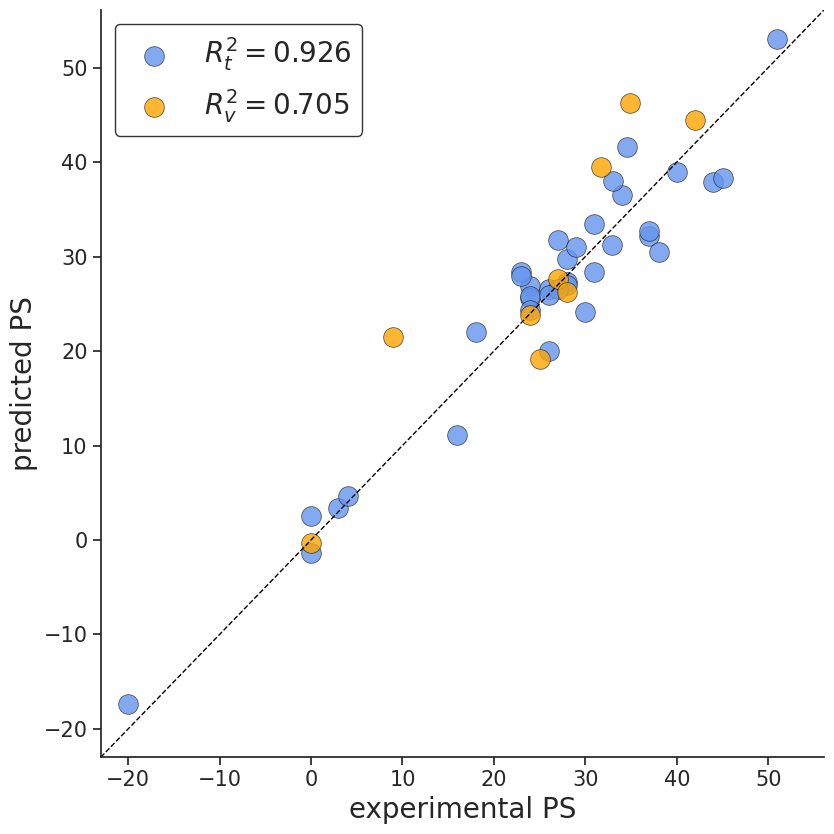

In [ ]:
#filename1= input('Enter the x axis label:')
#filename2= input('Enter the y axis label:')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')
sns.despine(left=False,right=False)

fig,ax=plt.subplots()
fig.set_size_inches(8.5,8.5)



ax1=sns.regplot(x=y_train, y=yhat_train_norm,ax=ax, fit_reg=False,color='cornflowerblue',
                   scatter_kws={'linewidths':0.5,
                             'edgecolor':'k',
                             's':200},
                marker='o',)
ax2=sns.regplot(x=y_test, y=yhat_test_norm,ax=ax, fit_reg=False,color='orange',
                scatter_kws={'linewidths':0.5,
                             'edgecolor':'k',
                             's':200},
                marker='o',)

plt.ylim(x_lim_minc,x_lim_maxc)
plt.xlim(x_lim_minc,x_lim_maxc)

#R2_legend='$R^{2}_{training}$'+str(R2)

R2_t=round(R2_train_norm,3)
R2_v=round(R2_test_norm,3)

legend_1=rf'$R^{2}_t = {R2_t}$'
legend_2=rf'$R^{2}_v = {R2_v}$'

plt.legend([legend_1,legend_2],
           bbox_to_anchor=(0, 1),
           loc='upper left',fontsize=20,edgecolor='black')

plt.plot([x_lim_minc,x_lim_maxc],[x_lim_minc,x_lim_maxc],lw=1,ls='dashed',color='black')

#Adding text inside a rectangular box by using the keyword 'bbox'
#plt.text(530, 880, '$R^{2} train=0.84$', fontsize = 22,
#         bbox = dict(facecolor = 'white', alpha = 0.5,edgecolor='black'))
#'r'$R^2 train=0.84$'

# Hide the right and top spines
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

#plt.title('Exp vs Pred',fontsize=20)
#plt.ylabel(filename1,fontsize=20)
#plt.xlabel(filename2,fontsize=20)
#plt.ylabel('predicted log P ',fontsize=20)
plt.ylabel('predicted PS', fontsize=20)
plt.xlabel('experimental PS',fontsize=20)

#plt.text(-3.7,3.2,'A',horizontalalignment='left',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#circle2 = plt.Circle((904, 843), 20, color='blue',fill=False)
#ax.add_patch(circle2)
if x_lim_minc < 0:
    y_pos_axis = x_lim_minc+abs(x_lim_minc*0.5)
elif x_lim_minc > 0:
    y_pos_axis = x_lim_minc-x_lim_minc*0.5

x_pos_axis = y_pos_axis

if x_pos_axis < 0:
    x_pos_axis_n = x_pos_axis+abs(x_pos_axis*0.4)
elif x_pos_axis > 0:
    x_pos_axis_n = x_pos_axis-x_pos_axis*0.5

y_pos_axis_n =  x_lim_maxc+x_lim_maxc*.05
#plt.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=14, verticalalignment='top')
#plt.text(x_pos_axis_n,y_pos_axis_n,equation,horizontalalignment='left',fontsize=20)

#plt.grid()
#plt.grid(color = 'lightgray', linestyle = 'dashed', linewidth = 0.5)


plt.tight_layout()
#plt.savefig("Fig_osbvspred_2var_wper_norm4_lr_log_ascending_eqtop_v2_insideT.png",dpi=600,transparent=True)
#plt.close()
plt.show()

In [ ]:
#Generate the data for the Williams's plot
X_train = x_train.values
X_test = x_test.values

y_train = y_train.values
y_test = y_test.values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Calculate leverage and standard deviation for the training set
hat_matrix_train = X_train @ np.linalg.inv(X_train.T @ X_train) @ X_train.T
leverage_train = np.diagonal(hat_matrix_train)
leverage_train=leverage_train.ravel()


# Calculate leverage and standard deviation for the test set
hat_matrix_test = X_test @ np.linalg.inv(X_train.T @ X_train) @ X_test.T
leverage_test = np.diagonal(hat_matrix_test)
leverage_test=leverage_test.ravel()


# y_true and y_pred are the actual and predicted values, respectively
residuals_train = y_train - y_pred_train
residuals_test = y_test -y_pred_test

std_dev_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
std_residual_train = (y_train - y_pred_train) / std_dev_train
std_residual_train = std_residual_train.ravel()

std_dev_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
std_residual_test = (y_test - y_pred_test) / std_dev_test
std_residual_test = std_residual_test.ravel()

# Create pandas dataframes for the leverage and standardized residuals
train_data = pd.DataFrame({'leverage': leverage_train, 'std_residual': std_residual_train})
test_data = pd.DataFrame({'leverage': leverage_test, 'std_residual': std_residual_test})

train_data['Series'] = 'Training'
test_data['Series'] = 'Prediction'

leverage_data = pd.concat([train_data,test_data],axis=0)
print(leverage_data.shape)

# Save dataframes to CSV files
leverage_data.to_csv('leverage_data.csv')
#train_data.to_csv('train_data.csv', index=False)
#test_data.to_csv('test_data.csv', index=False)

# Print the dataframes
print('\nTraining set:')
print(train_data[0:3])
print('\nTest set:')
print(test_data[0:3])

(45, 3)

Training set:
   leverage  std_residual    Series
0  0.243433      1.559848  Training
1  0.327901     -1.060102  Training
2  0.194270     -1.264547  Training

Test set:
   leverage  std_residual      Series
0  0.273574      0.020669  Prediction
1  0.206904     -0.369512  Prediction
2  0.164442     -0.091921  Prediction


In [ ]:
x_std_max=4
x_std_min=-4
#Getting maximum std value
if leverage_data['std_residual'].max() < 4:
    x_lim_max_std = x_std_max
elif  leverage_data['std_residual'].max() > 4:
    x_lim_max_std = round(leverage_data['std_residual'].max()) +1
#Getting minimum std value
if leverage_data['std_residual'].min() > -4:
    x_lim_min_std= x_std_min
elif  leverage_data['std_residual'].min() < 4:
    x_lim_min_std = round(leverage_data['std_residual'].min())-1

print('x_lim_max_std:',x_lim_max_std)
print('x_lim_min_std:',x_lim_min_std)

#Calculation H critical
n = X_train.shape[0]
p = X_train.shape[1]
h_value = 3*(p +1)/n
h_critical = round(h_value, 4)
print('Number of cases training:',n)
print('Number of variables:',p)
print('h_critical:',h_critical)

#Getting maximum leverage value
if leverage_data['leverage'].max() < h_critical:
    x_lim_max_lev = h_critical+h_critical*0.5
elif  leverage_data['leverage'].max() > h_critical:
    x_lim_max_lev =  leverage_data['leverage'].max()+( leverage_data['leverage'].max())*0.1

#Getting minimum leverage value
if leverage_data['leverage'].min() < 0:
    x_lim_min_lev = leverage_data['leverage'].min()-(leverage_data['leverage'].min())*0.05
elif  leverage_data['leverage'].min() >= 0:
    x_lim_min_lev = 0

print('x_lim_max_lev:',x_lim_max_lev)
print('x_lim_min_lev:',x_lim_min_lev)


x_lim_max_std: 4
x_lim_min_std: -4
Number of cases training: 36
Number of variables: 7
h_critical: 0.6667
x_lim_max_lev: 1.0000499999999999
x_lim_min_lev: 0


In [ ]:
#Import libraries to build the plot
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import time
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

<Figure size 640x480 with 0 Axes>

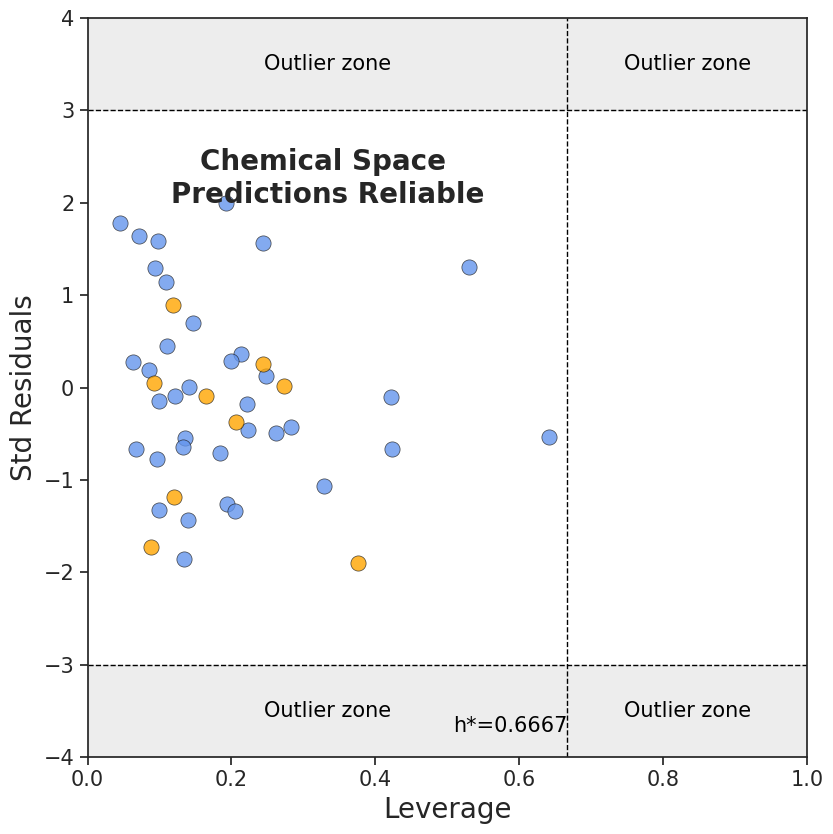

In [ ]:
#The William's Plot

import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style('white')
sns.despine(left=True,right=True)

fig,ax=plt.subplots()
fig.set_size_inches(8.5,8.5)

leverage1=train_data['leverage']
resid1=train_data['std_residual']
leverage2=test_data['leverage']
resid2=test_data['std_residual']

ax1=sns.regplot(x=leverage1, y=resid1,ax=ax, fit_reg=False,color='cornflowerblue',
                marker='o',scatter_kws={'s':120,
                                       'linewidths':0.5,
                             'edgecolor':'k',})
ax2=sns.regplot(x=leverage2, y=resid2,ax=ax, fit_reg=False,color='orange',
                marker='o',scatter_kws={'s':120,
                                       'linewidths':0.5,
                             'edgecolor':'k',})
display_h='h*='+str(h_critical)

ax1.text(h_critical,x_lim_min_std+0.45, display_h, verticalalignment='top', horizontalalignment='right',
         color='black', fontsize=15,fontweight='normal')

ax1.text((h_critical+x_lim_min_lev)/2,-3.50, 'Outlier zone', verticalalignment='center',
         horizontalalignment='center',
         color='black', fontsize=15,fontweight='normal')
ax1.text((h_critical+x_lim_min_lev)/2,3.50, 'Outlier zone', verticalalignment='center',
         horizontalalignment='center',
         color='black', fontsize=15,fontweight='normal')

ax1.text((h_critical+x_lim_max_lev)/2,-3.50, 'Outlier zone', verticalalignment='center',
         horizontalalignment='center',
         color='black', fontsize=15,fontweight='normal')
ax1.text((h_critical+x_lim_max_lev)/2,3.50, 'Outlier zone', verticalalignment='center',
         horizontalalignment='center',
         color='black', fontsize=15,fontweight='normal')


#plt.grid(True,ls='dashed',color='black',lw='0.4',alpha=0.2)

plt.ylim(x_lim_min_std, x_lim_max_std)
plt.xlim(x_lim_min_lev,x_lim_max_lev)

#plt.legend(['training','validation'],bbox_to_anchor=(0.99, 0.24),loc='upper right',
 #          fontsize=14,edgecolor='black')
plt.plot([h_critical,h_critical],[x_lim_min_std,x_lim_max_std],lw=1,ls='dashed',color='black')
plt.plot([x_lim_min_lev,x_lim_max_lev],[3,3],lw=1,ls='dashed',color='black')
plt.plot([x_lim_min_lev,x_lim_max_lev],[-3,-3],lw=1,ls='dashed',color='black')


ax1.add_patch(
    patches.Rectangle(
        xy=(x_lim_min_lev, x_lim_min_std),  # point of origin.
        width=7, height=abs(x_lim_min_std)-3, linewidth=1,
        color='lightgray', fill=True,alpha=0.4))

ax1.add_patch(
    patches.Rectangle(
        xy=(x_lim_min_lev,3),  # point of origin.
        width=3, height=x_lim_max_std-3, linewidth=1,
        color='lightgray', fill=True,alpha=0.4))

# Hide the right and top spines
#ax1.spines.right.set_visible(False)
#ax1.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')


plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.title('Applicability Domain',fontsize=20)
plt.ylabel('Std Residuals',fontsize=20)
plt.xlabel('Leverage',fontsize=20)
x_axis_text = (x_lim_min_lev+h_critical)/2
plt.text(x_axis_text,2,'Chemical Space \nPredictions Reliable',
         horizontalalignment='center',fontsize=20,fontweight='bold')




plt.tight_layout()


#plt.savefig("Fig_AD_2var_32wper_lr_log_norm4_ascending.png",dpi=600,transparent=True)
#plt.close()
plt.show()